In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv(r'C:\Users\arijb\OneDrive\Desktop\M1 Data Sciences\test\Social_Network_Ads.csv')

In [4]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [7]:
df.dtypes

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

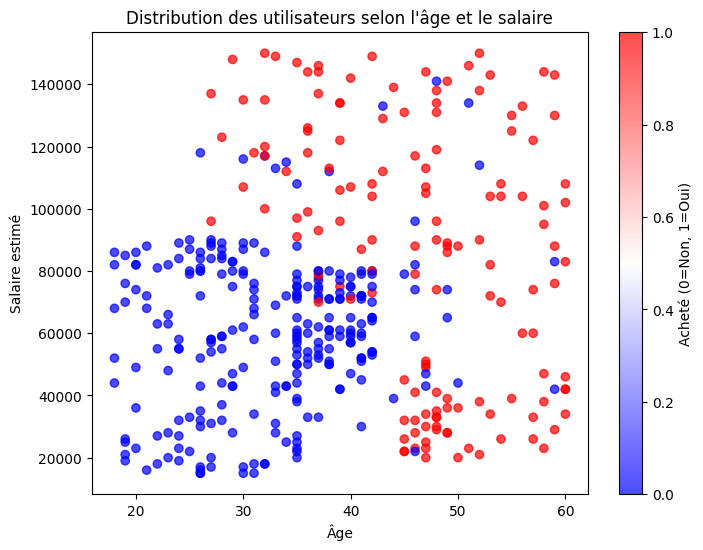

In [8]:
# Supposons que les colonnes sont : Age, EstimatedSalary, Purchased
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Purchased'], cmap='bwr', alpha=0.7)
plt.title('Distribution des utilisateurs selon l\'âge et le salaire')
plt.xlabel('Âge')
plt.ylabel('Salaire estimé')
plt.colorbar(label='Acheté (0=Non, 1=Oui)')
plt.show()


In [9]:
X = df[['Age', 'EstimatedSalary']]   
y = df['Purchased']  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
acc = accuracy_score(y_test, y_pred)

In [13]:
cm

array([[50,  2],
       [ 7, 21]])

In [14]:
acc

0.8875

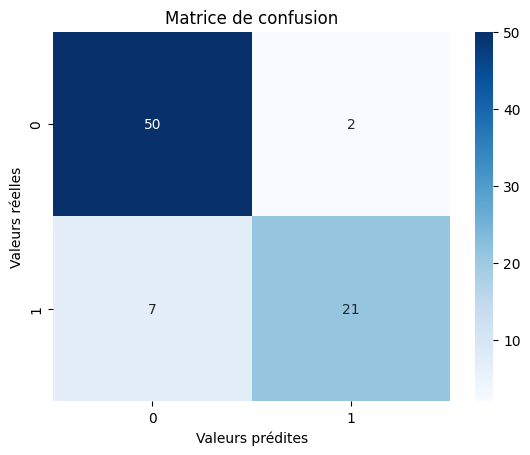

In [15]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()

In [17]:
from sklearn.metrics import classification_report

print("🔎 Rapport - Régression Logistique :")
print(classification_report(y_test, y_pred))

print("🔎 Rapport - KNN :")
print(classification_report(y_test, y_pred))

print("🔎 Rapport - Arbre de décision :")
print(classification_report(y_test, y_pred))


🔎 Rapport - Régression Logistique :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

🔎 Rapport - KNN :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

🔎 Rapport - Arbre de décision :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.8